In [1]:
import numpy as np
import pandas as pd

In [2]:
# equation 9.3, pg 160
def pareto_max_pdf(x, n, alpha=2, L=1):
    left = alpha * n * (L / x) ** alpha
    right = (1 - (L / x) ** alpha) ** (n - 1)
    return (left * right) / x

In [3]:
# equation 9.4, pg 160
def frechet_pdf(x, n, alpha=2, L=1):
    beta = L * n ** (1 / alpha)

    left = alpha * beta**alpha
    mid = x ** (-alpha - 1)
    right = np.e ** ((beta**alpha) * (-(x**-alpha)))

    return left * mid * right

In [4]:
def pdf_ratio(x, n, alpha=2, L=1):
    return pareto_max_pdf(x, n, alpha, L) / frechet_pdf(x, n, alpha, L)

In [6]:
x = 5
n = 100
pdf_ratio(x, n)

0.9594669036057578

In [8]:
sample_sizes = [1, 10, 100, 1_000]
x = range(2, 51)  # x=1 is undefined so we start with x=2
index_df = pd.Series(x, name="x").to_frame().set_index("x")

In [9]:
pareto_max_df = index_df.copy()
for n in sample_sizes:
    pareto_max_df[f'pareto_max_n{n}'] = pareto_max_df.index.map( lambda x: pareto_max_pdf(x, n, alpha=2, L=1) )
    
pareto_max_df.head()

,pareto_max_n1,pareto_max_n10,pareto_max_n100,pareto_max_n1000
x,,,,
2,0.250000,0.187712,1.069067e-11,3.838328e-123
3,0.074074,0.256622,6.390966e-05,5.865382e-50
4,0.031250,0.174820,5.248152e-03,3.120004e-27
5,0.016000,0.110805,2.811720e-02,3.112302e-17
6,0.009259,0.071857,5.693313e-02,5.550783e-12


In [10]:
frechet_df = index_df.copy()
for n in sample_sizes:
    frechet_df[f'frechet_n{n}'] = frechet_df.index.map( lambda x: frechet_pdf(x, n, alpha=2, L=1) )

frechet_df.head()

,frechet_n1,frechet_n10,frechet_n100,frechet_n1000
x,,,,
2,0.194700,0.205212,3.471986e-10,6.672976e-107
3,0.066284,0.243847,1.107062e-04,4.118355e-47
4,0.029357,0.167269,6.032669e-03,2.246182e-26
5,0.015373,0.107251,2.930502e-02,6.797367e-17
6,0.009006,0.070136,5.757086e-02,7.995408e-12


In [11]:
ratio_df = index_df.copy()
for n in sample_sizes:
    ratio_df[f'ratio_n{n}'] = ratio_df.index.map( lambda x: pdf_ratio(x, n, alpha=2, L=1) )
    
ratio_df.head()

,ratio_n1,ratio_n10,ratio_n100,ratio_n1000
x,,,,
2,1.284025,0.914719,0.030791,5.752049e-17
3,1.117519,1.052390,0.577291,1.424205e-03
4,1.064494,1.045143,0.869955,1.389026e-01
5,1.040811,1.033139,0.959467,4.578688e-01
6,1.028167,1.024536,0.988923,6.942464e-01


<AxesSubplot:title={'center':'Sample Max: Exact PDF'}, xlabel='x', ylabel='Probability Density'>

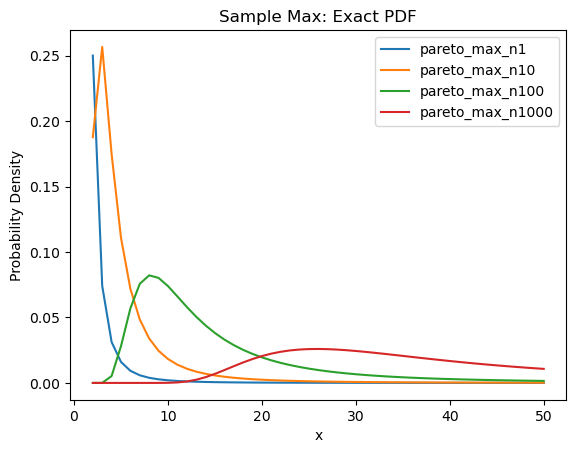

In [12]:
plot_kwargs = {'title':'Sample Max: Exact PDF',
               'ylabel':'Probability Density'}

pareto_max_df.plot(**plot_kwargs)

<AxesSubplot:title={'center':'Sample Max: Fréchet PDF'}, xlabel='x', ylabel='Probability Density'>

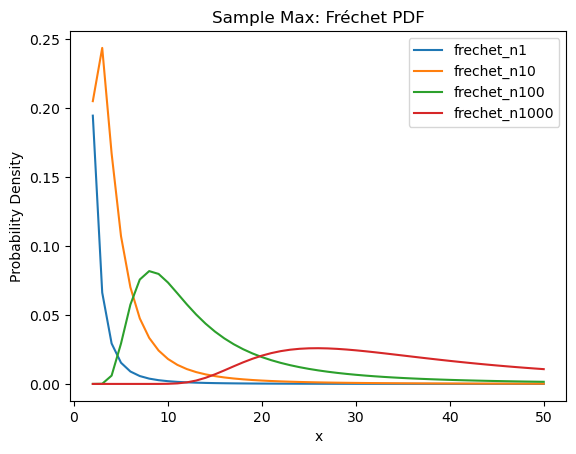

In [14]:
plot_kwargs = {'title':'Sample Max: Fréchet PDF',
               'ylabel':'Probability Density'}

frechet_df.plot(**plot_kwargs)

<AxesSubplot:title={'center':'Sample Max: Exact PDF vs. Fréchet PDF'}, xlabel='x', ylabel='Ratio'>

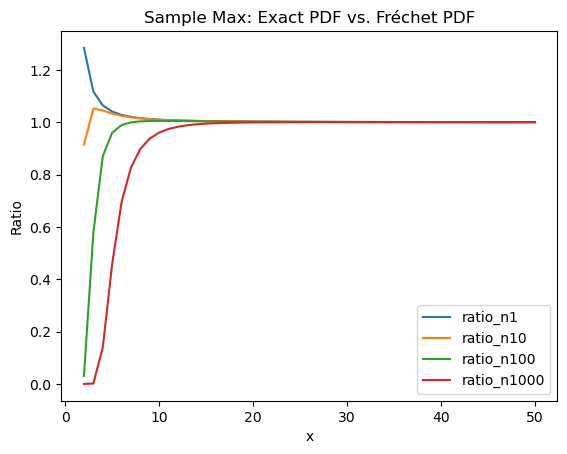

In [15]:
plot_kwargs = {'title':'Sample Max: Exact PDF vs. Fréchet PDF',
               'ylabel':'Ratio'}

ratio_df.plot(**plot_kwargs)